# Ejemplo Multiclasificación

Creamos unos datos que puedan ser divididos en tres clases relativamente fácil con una función lineal.

Los vemos matricialmente y gráficamente.

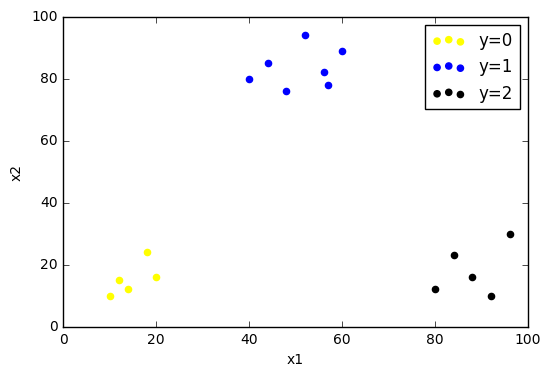

array([[ 10.,  10.,   0.],
       [ 12.,  15.,   0.],
       [ 14.,  12.,   0.],
       [ 18.,  24.,   0.],
       [ 20.,  16.,   0.],
       [ 40.,  80.,   1.],
       [ 44.,  85.,   1.],
       [ 48.,  76.,   1.],
       [ 52.,  94.,   1.],
       [ 56.,  82.,   1.],
       [ 60.,  89.,   1.],
       [ 57.,  78.,   1.],
       [ 80.,  12.,   2.],
       [ 84.,  23.,   2.],
       [ 88.,  16.,   2.],
       [ 92.,  10.,   2.],
       [ 96.,  30.,   2.]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x1_0 = [10,12,14,18,20] ; x2_0 = [10,15,12,24,16]
x1_1 = [40,44,48,52,56,60,57] ; x2_1 = [80,85,76,94,82,89,78]
x1_2 = [80,84,88,92,96] ; x2_2 = [12,23,16,10,30]
def plot3clases(x1_0, x2_0, x1_1, x2_1, x1_2, x2_2):
    plt.scatter(x1_0, x2_0, color = "yellow")
    plt.scatter(x1_1, x2_1, color = "blue")
    plt.scatter(x1_2, x2_2, color = "black")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(['y=0','y=1', 'y=2'], loc=1)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
plot3clases(x1_0, x2_0, x1_1, x2_1, x1_2, x2_2)
plt.show()
X1 = np.r_[x1_0, x1_1, x1_2]
X2 = np.r_[x2_0, x2_1, x2_2]
X = np.c_[X1, X2]
y = np.zeros(np.shape(X)[0])
y[5:12]=1 ; y[12:17]=2
np.c_[X, y]

Vamos a aplicar scikit-learn para encontrar los parámetros de cada una de las hipótesis

In [7]:
from sklearn import linear_model
reg = linear_model.LogisticRegression(C=1)
reg.fit(X, y)
print('Vector de terminos bias de dimensión',np.shape(reg.intercept_))
print('Vector de parámetros de dimensión', np.shape(reg.coef_))

Vector de terminos bias de dimensión (3,)
Vector de parámetros de dimensión (3, 2)


$h_{\theta}(x)^{(0)}=P(y=0 \ |\ x;\theta)= \dfrac{1}{1+ e^{-(\theta_{0}^{0} + \theta_{1}^{0}x_{1}+ \theta_{2}^{0}x_{2})}}  \text{ con } \theta_{0}^{0}, \theta_{1}^{0}, \theta_{2}^{0}\text{ parámetros }$ <p>
Dibujo la frontera de decisión para p=0.5, es decir, $\theta_{0}^{0} + \theta_{1}^{0}x_{1} + \theta_{2}^{0}x_{2}=0$

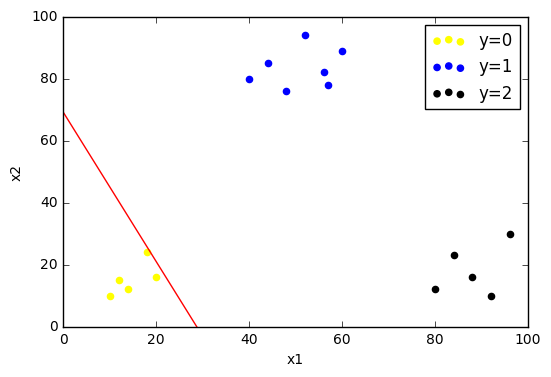

In [8]:
plot3clases(x1_0, x2_0, x1_1, x2_1, x1_2, x2_2)
x= np.arange(0, 100)
plt.plot(x, -(reg.intercept_[0] + x*reg.coef_[0][0])/reg.coef_[0][1], color = 'red')
plt.show()

$h_{\theta}(x)^{(1)}=P(y=1 \ | \ x;\theta)= \dfrac{1}{1+ e^{-(\theta_{0}^{1} + \theta_{1}^{1}x_{1}+ \theta_{2}^{1}x_{2})}}  \text{ con } \theta_{0}^{1}, \theta_{1}^{1}, \theta_{2}^{1}\text{ parámetros }$ <p>
Dibujo la frontera de decisión para p=0.5, es decir, $\theta_{0}^{1} + \theta_{1}^{1}x_{1} + \theta_{2}^{1}x_{2}=0$

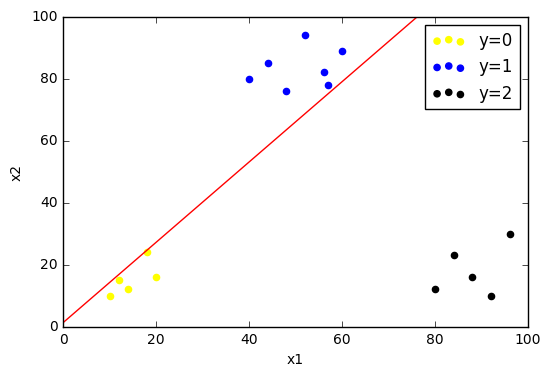

In [9]:
plot3clases(x1_0, x2_0, x1_1, x2_1, x1_2, x2_2)
x= np.arange(0, 100)
plt.plot(x, -(reg.intercept_[1] + x*reg.coef_[1][0])/reg.coef_[1][1], color = 'red')
plt.show()

$h_{\theta}(x)^{(2)}=P(y=2 \ | \ x;\theta)= \dfrac{1}{1+ e^{-(\theta_{0}^{2} + \theta_{1}^{2}x_{1}+ \theta_{2}^{2}x_{2})}}  \text{ con } \theta_{0}^{2}, \theta_{1}^{2}, \theta_{2}^{2}\text{ parámetros }$ <p>
Dibujo la frontera de decisión para p=0.5, es decir, $\theta_{0}^{2} + \theta_{1}^{2}x_{1} + \theta_{2}^{2}x_{2}=0$

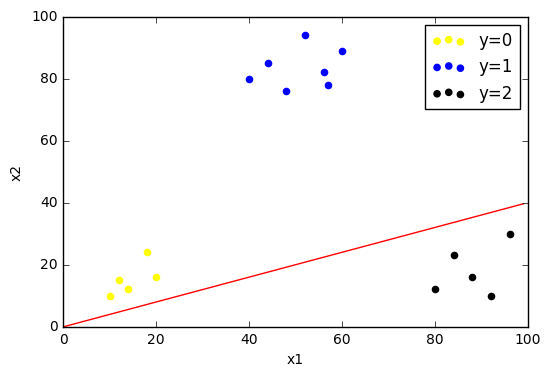

In [10]:
plot3clases(x1_0, x2_0, x1_1, x2_1, x1_2, x2_2)
x= np.arange(0, 100)
plt.plot(x, -(reg.intercept_[2] + x*reg.coef_[2][0])/reg.coef_[2][1], color = 'red')
plt.show()

Dado un nuevo punto $ a = [50,50]$ (triángulo verde), calculo la probabilidad de pertenecer a cada clase con

$$P(y=k \ | \ x; \theta) =\dfrac{ P(y=k \| \ x;\theta^{(k)})}{\sum_{i=1}^{n}P(y=i \ | \ x;\theta^{(i)})}$$



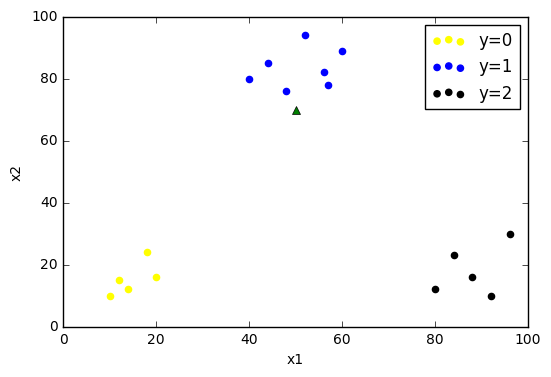

Probabilidad de la clase 0     0.0705581827208
Probabilidad de la clase 1     0.929441817278
Probabilidad de la clase 2     1.37154467695e-12
Mi predicción sería la de mayor probabilidad, la clase y=1.


In [37]:
plot3clases(x1_0, x2_0, x1_1, x2_1, x1_2, x2_2)
a = np.array([50,70])
plt.plot(a[0],a[1], 'g^')
plt.show()
suma =0
prob = np.zeros(3)
for k in range(0,3):
    suma = suma + 1/(1+np.exp(-reg.intercept_[k]-a[0]*reg.coef_[k][0]
                              -a[1]*reg.coef_[k][1]))
    prob[k] = 1/(1+np.exp(-reg.intercept_[k]-a[0]*reg.coef_[k][0]
                             -a[1]*reg.coef_[k][1]))
print('Probabilidad de la clase 0    ', prob[0]/suma)
print('Probabilidad de la clase 1    ', prob[1]/suma)
print('Probabilidad de la clase 2    ', prob[2]/suma)

print('Mi predicción sería la de mayor probabilidad, la clase y=1.')

Es conveniente utilizar la función propia de scikit-learn para el cálculo de probabilidades.

In [36]:
from decimal import *

prob_sklearn = np.zeros(3)

for k in range(0,3):
    prob_sklearn[k] = Decimal(reg.predict_proba(a.reshape(1,-1))[0][k])
print('Probabilidad de la clase 0    ', prob_sklearn[0])
print('Probabilidad de la clase 1    ', prob_sklearn[1])
print('Probabilidad de la clase 2    ', prob_sklearn[2])

print('Mi predicción sería la de mayor probabilidad, la clase y=1.')

Probabilidad de la clase 0     0.0705581827208
Probabilidad de la clase 1     0.929441817278
Probabilidad de la clase 2     1.37154467695e-12
Mi predicción sería la de mayor probabilidad, la clase y=1.


PD: Dado un punto nuevo para el cual queremos predecir su clase, la distancia euclidea no se tiene en cuenta en nuestro modelo de regresión logística.